# Exploratory Data Analysis (EDA)

## Table of Contents

1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [93]:
# Import necessary libraries
import pandas as pd
import numpy as npwhats
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame


In [94]:

# !ls ../1_DatasetCharacteristics

## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [95]:
df = pd.read_csv('../1_DatasetCharacteristics/share_w6_retirees.csv')

# df = pd.read_csv('share_w6_retirees.csv')

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())


Number of samples: 1394
Number of features: 127
Example data:
        mergeid        hhid6     mergeidp6        coupleid6  country  \
0  AT-022659-01  AT-022659-A  AT-022659-02  AT-022659-01-02       11   
1  AT-022659-02  AT-022659-A  AT-022659-01  AT-022659-01-02       11   
2  AT-022738-03  AT-022738-A  AT-022738-01  AT-022738-01-03       11   
3  AT-058892-03  AT-058892-A  AT-058892-02  AT-058892-02-03       11   
4  AT-059781-01  AT-059781-A  AT-059781-02  AT-059781-01-02       11   

   language  ac011__1  ac012__1  ac014__1  ac015__1  ac016__1  ac017__1  \
0        11       1.0       8.0       3.0       3.0       4.0       1.0   
1        11       1.0       9.0       2.0       3.0       4.0       2.0   
2        11       1.0       9.0       4.0       4.0       4.0       1.0   
3        11       1.0      10.0       4.0       4.0       4.0       1.0   
4        11       1.0      10.0       4.0       3.0       4.0       1.0   

   ac018__1  ac019__1  ac020__1  ac021__1  ac022__1  a

In [96]:
object_cols = df.select_dtypes(include='object')

In [97]:
df.drop(columns=object_cols.columns, inplace=True) # removing object columns because they are not useful for numerical analysis

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [98]:
df['ep036__7'].replace({-1: 0, -2: 0}, inplace=True)  # Convert Yes/No to 1/0

/tmp/ipykernel_30986/1025937224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ep036__7'].replace({-1: 0, -2: 0}, inplace=True)  # Convert Yes/No to 1/0


In [99]:
df['ep036__7'].value_counts()

ep036__7
1.0    710
5.0    670
0.0     12
Name: count, dtype: int64

In [100]:
df = df[df['ep036__7'] != 0.0]

In [101]:
df['ep036__7'].value_counts()

ep036__7
1.0    710
5.0    670
Name: count, dtype: int64

In [102]:
df['ep036__7'] = df['ep036__7'].replace({5: 0})

In [103]:
df['ep036__7'].value_counts()

ep036__7
1.0    710
0.0    670
Name: count, dtype: int64

In [104]:
df = df.loc[:, df.isnull().mean() < 0.5] # Drop columns with more than 50% missing values

In [105]:
missing_values = df.isnull().sum() # Check for missing values
missing_values.sum()

np.int64(4446)

In [106]:
df.fillna(0, inplace=True) 

In [107]:
missing_values = df.isnull().sum() # Check for missing values
missing_values.sum()

np.int64(0)

In [108]:
missing_values = df.isnull().sum()
missing_values.sum()

np.int64(0)

In [109]:
df.shape

(1382, 123)

In [111]:
object_cols = df.select_dtypes(include='object')
df.drop(columns=object_cols.columns, inplace=True) # removing object columns because they are not

In [112]:
df.to_csv('../1_DatasetCharacteristics/share_w6_retirees_cleaned.csv', index=False)

In [ ]:
y = df['ep036__7']
X = df.drop(columns=['ep036__7'])

## Feature Distributions


In [ ]:
df.head()

,country,language,ac011__1,ac012__1,ac014__1,ac015__1,ac016__1,ac017__1,ac018__1,ac019__1,ac020__1,ac021__1,ac022__1,ac023__1,ac024__1,ac025__1,ac035d1_1,ac035d4_1,ac035d5_1,ac035d7_1,ac035d8_1,ac035d9_1,ac035d10_1,ac035dno_1,ac037__1,exrate_2,br015__3,br016__3,br039__3,co211__5,dn036__6,dn037__6,dn042__6,dn044__6,ep007__7,ep009__7,ep013__7,ep026__7,ep027__7,ep028__7,ep029__7,ep030__7,ep031__7,ep032__7,ep033__7,ep034__7,ep035__7,ep036__7,ep037__7,ep097__7,ep098d1_7,ep098d4_7,ep141d1_7,ep141d2_7,ep141d3_7,ep141d4_7,ep141d5_7,ep141dno_7,ep204__7,ep206__7,gs004__8,gs006__8,gs007__8,gs008__8,gs009__8,it001__10,it003__10,mh002__11,mh004__11,mh007__11,mh013__11,mh034__11,mh037__11,ph003__12,ph004__12,ph005__12,ph006d1_12,ph006d2_12,ph006d3_12,ph006d4_12,ph006d5_12,ph006d6_12,ph006d10_12,ph006d11_12,ph006d12_12,ph006d13_12,ph006d14_12,ph006d15_12,ph006d16_12,ph006d18_12,ph006d19_12,ph006d20_12,ph006d21_12,ph006dno_12,ph006dot_12,ph011d1_12,ph011d2_12,ph011d3_12,ph011d4_12,ph011d6_12,ph011d7_12,ph011d8_12,ph011d9_12,ph011d10_12,ph011d11_12,ph011d13_12,ph011d14_12,ph011d15_12,ph011dno_12,ph011dot_12,ph046__12,ph061__12,ph084__12,ep064d1_7_w9,ep064d2_7_w9,ep064d3_7_w9,ep064d4_7_w9,ep064d5_7_w9,ep064d6_7_w9,ep064d7_7_w9,ep064d8_7_w9,ep064d9_7_w9,ep064d10_7_w9,target_missing
0,11,11,1.0,8.0,3.0,3.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,1.0,2.0,1.0,1.0,5.0,1.0,1.0,1,5.0,5.0,1.0,39.0,2.0,3.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,4.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,3.0,48.0,41.0,37.0,41.0,1.0,3.0,5.0,2.0,2.0,5.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,11,11,1.0,9.0,2.0,3.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0,4.0,3.0,5.0,5.0,1.0,2.0,2,5.0,5.0,2.0,55.0,1.0,4.0,3.0,4.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,24.0,26.0,27.0,25.0,1.0,2.0,5.0,2.0,2.0,5.0,3.0,3.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,11,11,1.0,9.0,4.0,4.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0,1.0,1.0,1.0,1.0,5.0,1.0,2.0,1,5.0,5.0,2.0,38.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,56.0,57.0,58.0,60.0,1.0,2.0,5.0,2.0,2.0,5.0,3.0,3.0,2.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,11,11,1.0,10.0,4.0,4.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,1.0,2.0,1.0,1.0,5.0,2.0,2.0,1,5.0,5.0,1.0,45.0,2.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,42.0,43.0,51.0,57.0,1.0,3.0,5.0,2.0,2.0,5.0,3.0,3.0,3.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11,11,1.0,10.0,4.0,3.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,1.0,3.0,1.0,5.0,5.0,0.0,1.0,2,5.0,5.0,1.0,39.0,2.0,3.0,3.0,1.0,4.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,24.0,21.0,27.0,26.0,5.0,4.0,5.0,2.0,2.0,5.0,3.0,3.0,2.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df['ep036__7'].value_counts()

ep036__7
 1.0    712
 5.0    670
-1.0      9
-2.0      3
Name: count, dtype: int64

In [ ]:
df.columns

Index(['country', 'language', 'ac011__1', 'ac012__1', 'ac014__1', 'ac015__1',
       'ac016__1', 'ac017__1', 'ac018__1', 'ac019__1',
       ...
       'ep064d2_7_w9', 'ep064d3_7_w9', 'ep064d4_7_w9', 'ep064d5_7_w9',
       'ep064d6_7_w9', 'ep064d7_7_w9', 'ep064d8_7_w9', 'ep064d9_7_w9',
       'ep064d10_7_w9', 'target_missing'],
      dtype='object', length=124)

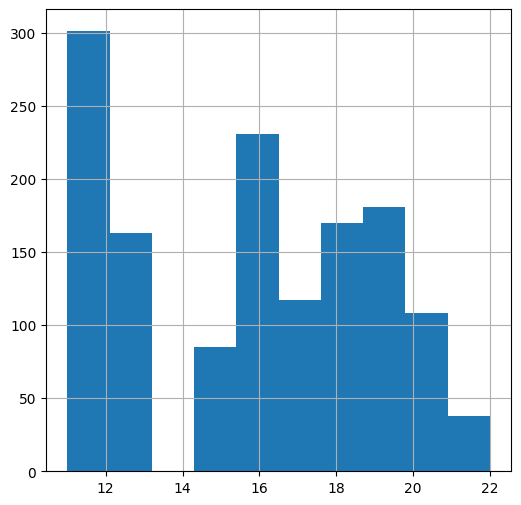

In [ ]:
# Example: Plotting histograms of all numerical features
df.language.hist(figsize=(6, 6))
plt.show()


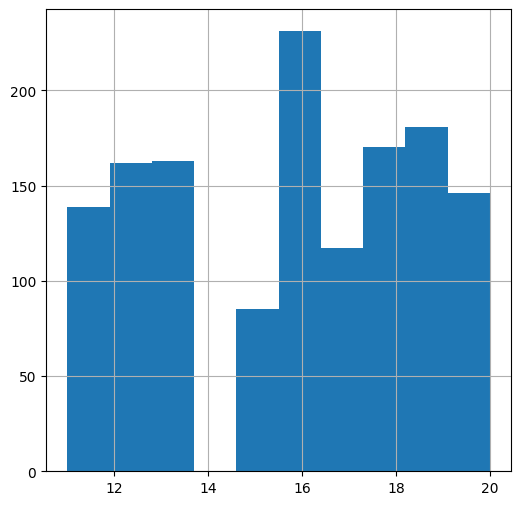

In [ ]:
# Example: Plotting histograms of all numerical features
df.country.hist(figsize=(6, 6))
plt.show()

/tmp/ipykernel_30986/2719729277.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue=target, common_norm=False, fill=True)


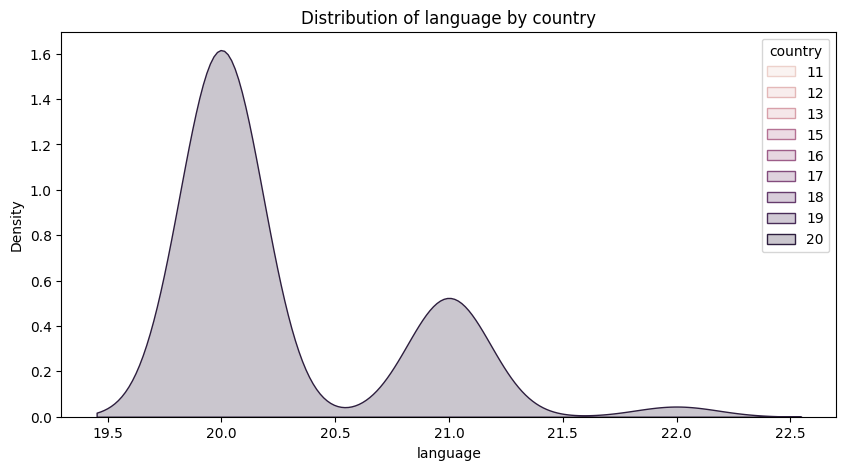

In [ ]:
def plot_feature_distribution(df, feature, target):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=feature, hue=target, common_norm=False, fill=True)
    plt.title(f'Distribution of {feature} by {target}')
    plt.show()

plot_feature_distribution(df, 'language', 'country')

## Possible Biases

#### Performing Feature Selection (Random Forest Importance)


In [ ]:
target = df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 5, 10, 15, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['auto', 'sqrt', 'log2']
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # cross-validation


grid_search = GridSearchCV(  # GridSearchCV for tuning
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_.named_steps['clf']

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
357 fits failed with the following error:
Traceback (most recent call last):
  File "/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **f

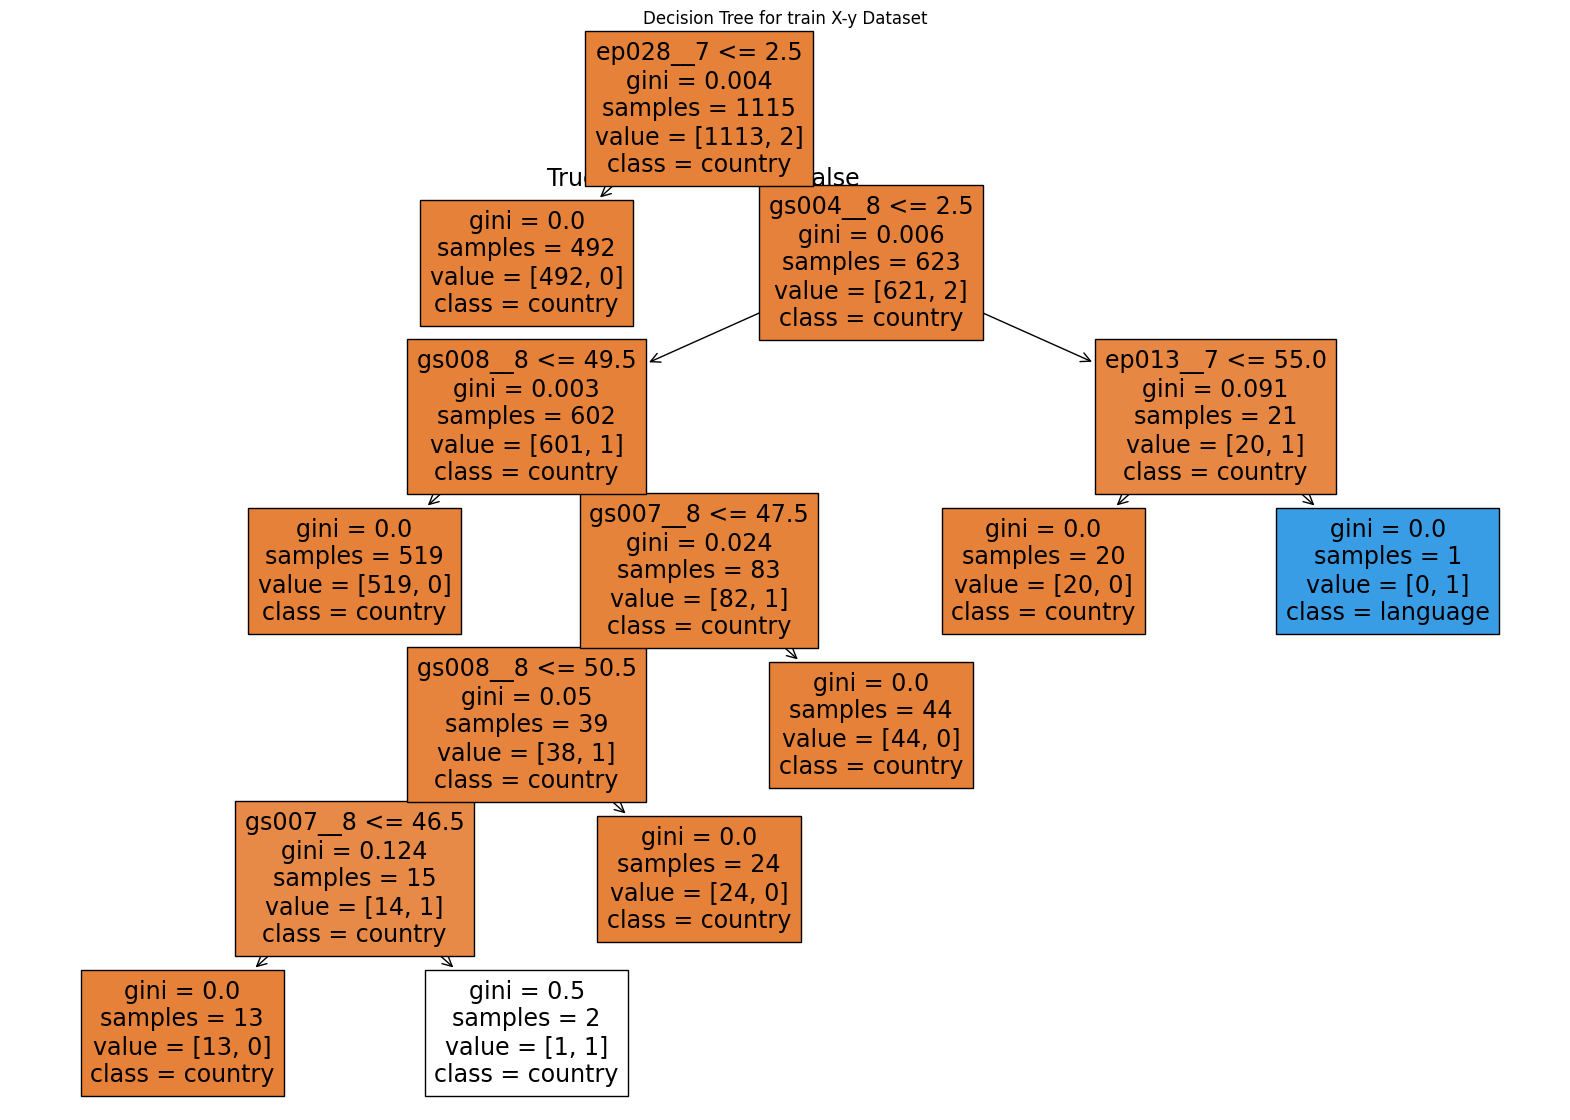

FileNotFoundError: [Errno 2] No such file or directory: 'docs/decision_tree.png'

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20, 14))
plot_tree(best_model, feature_names=X_train.columns, class_names=X_train.columns, filled=True)
plt.title("Decision Tree for train X-y Dataset")
plt.show()
plt.savefig('docs/decision_tree.png')

In [ ]:
tree_rules = export_text(best_model, feature_names=list(X_train.columns))

# Save to a text file
with open("docs/decision_tree_rules.txt", "w") as f:
    f.write(tree_rules)

In [ ]:
def get_top_features(model, X, top_n=20):
    importances = pd.Series(model.feature_importances_, index=X.columns)
    sorted_importances = importances[importances>0.01].sort_values(ascending=False)


# print("Top 20 Important Features:")
print(get_top_features(best_model, X_train))

NameError: name 'best_model' is not defined

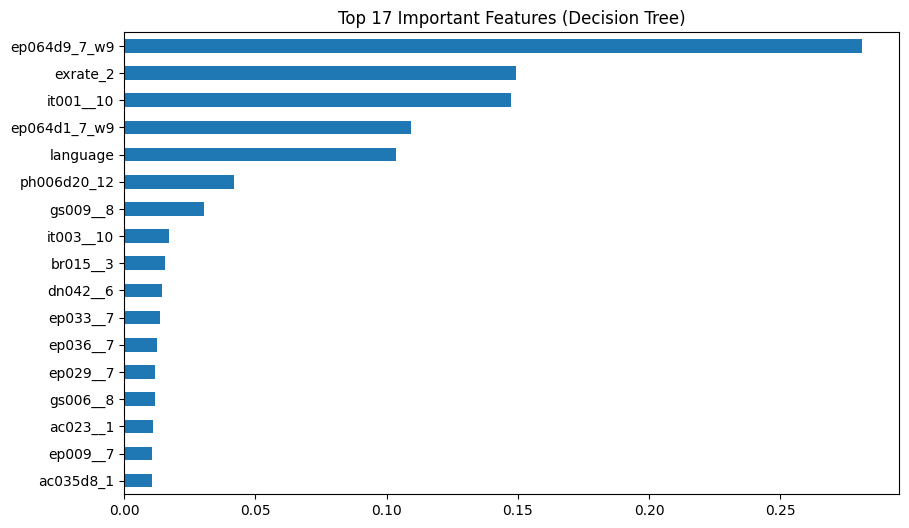

In [ ]:
top_n = 17  # I have decided to use top 18 features for our analysis based on elbow/visual inspection
plt.figure(figsize=(10, 6))
sorted_importances[:top_n].plot(kind='barh')
plt.title(f"Top {top_n} Important Features (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
selected_features = sorted_importances.head(17).index.tolist()

In [ ]:
X_reduced = X_train[selected_features]

In [ ]:
X_reduced

,ep064d9_7_w9,exrate_2,it001__10,ep064d1_7_w9,language,ph006d20_12,gs009__8,it003__10,br015__3,dn042__6,ep033__7,ep036__7,ep029__7,gs006__8,ac023__1,ep009__7,ac035d8_1
176,0.0,1.0679,1.0,0.0,20,0.0,45.0,4.0,2.0,1,2.0,5.0,4.0,48.0,1.0,3.0,1.0
251,0.0,1.0679,1.0,0.0,20,0.0,66.0,4.0,2.0,1,2.0,5.0,4.0,62.0,1.0,1.0,1.0
761,0.0,1.0000,1.0,1.0,17,0.0,33.0,4.0,1.0,1,3.0,1.0,3.0,30.0,3.0,1.0,0.0
755,0.0,1.0000,1.0,0.0,17,0.0,49.0,4.0,2.0,2,2.0,1.0,1.0,44.0,3.0,1.0,1.0
730,0.0,1.0000,5.0,0.0,17,1.0,22.0,4.0,2.0,2,1.0,1.0,3.0,21.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.0,1.0000,5.0,1.0,11,0.0,56.0,6.0,1.0,1,3.0,5.0,2.0,48.0,3.0,1.0,1.0
446,0.0,1.0000,1.0,0.0,12,0.0,45.0,4.0,2.0,1,1.0,1.0,4.0,45.0,2.0,1.0,0.0
1062,0.0,1.0000,1.0,1.0,16,1.0,28.0,6.0,4.0,2,2.0,1.0,3.0,25.0,2.0,2.0,1.0
353,1.0,1.0000,5.0,1.0,12,0.0,41.0,5.0,1.0,2,4.0,1.0,2.0,35.0,2.0,2.0,1.0


In [ ]:
sns.countplot(x='ph006dno_12', data=df) # Checking for class imbalance


ValueError: Could not interpret value `ph006dno_12` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='ep036__7', ylabel='count'>

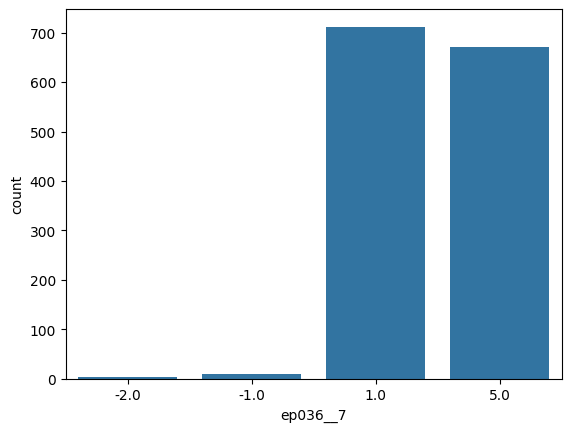

In [ ]:
sns.countplot(x='ep036__7', data=df) # Checking for target class imbalance 


In [ ]:
X_reduced = X_reduced.replace({-2.0: -1.0}) # 

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


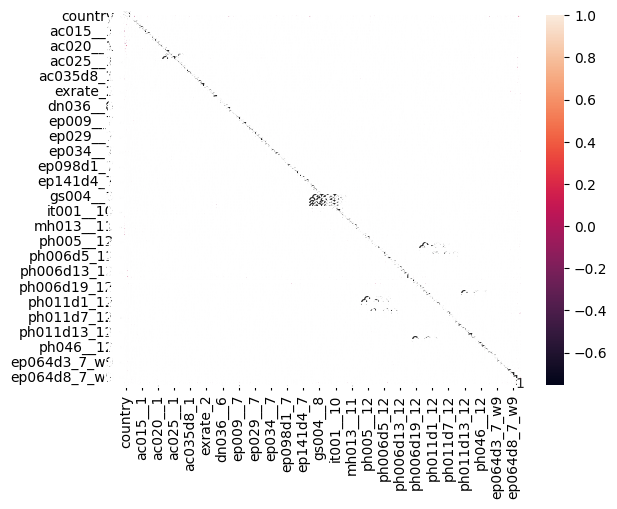

In [ ]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
